In [2]:
import pandas as pd 


In [3]:
df = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None)
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
df.columns = ["frequency","angle of attack","chord length", "free stream velocity","ssd thickness","pressure level"]
df.head()

,frequency,angle of attack,chord length,free stream velocity,ssd thickness,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


# before correlation first we do train test split

In [5]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
import numpy as pd

In [7]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [8]:
X_train.head()

,frequency,angle of attack,chord length,free stream velocity,ssd thickness
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

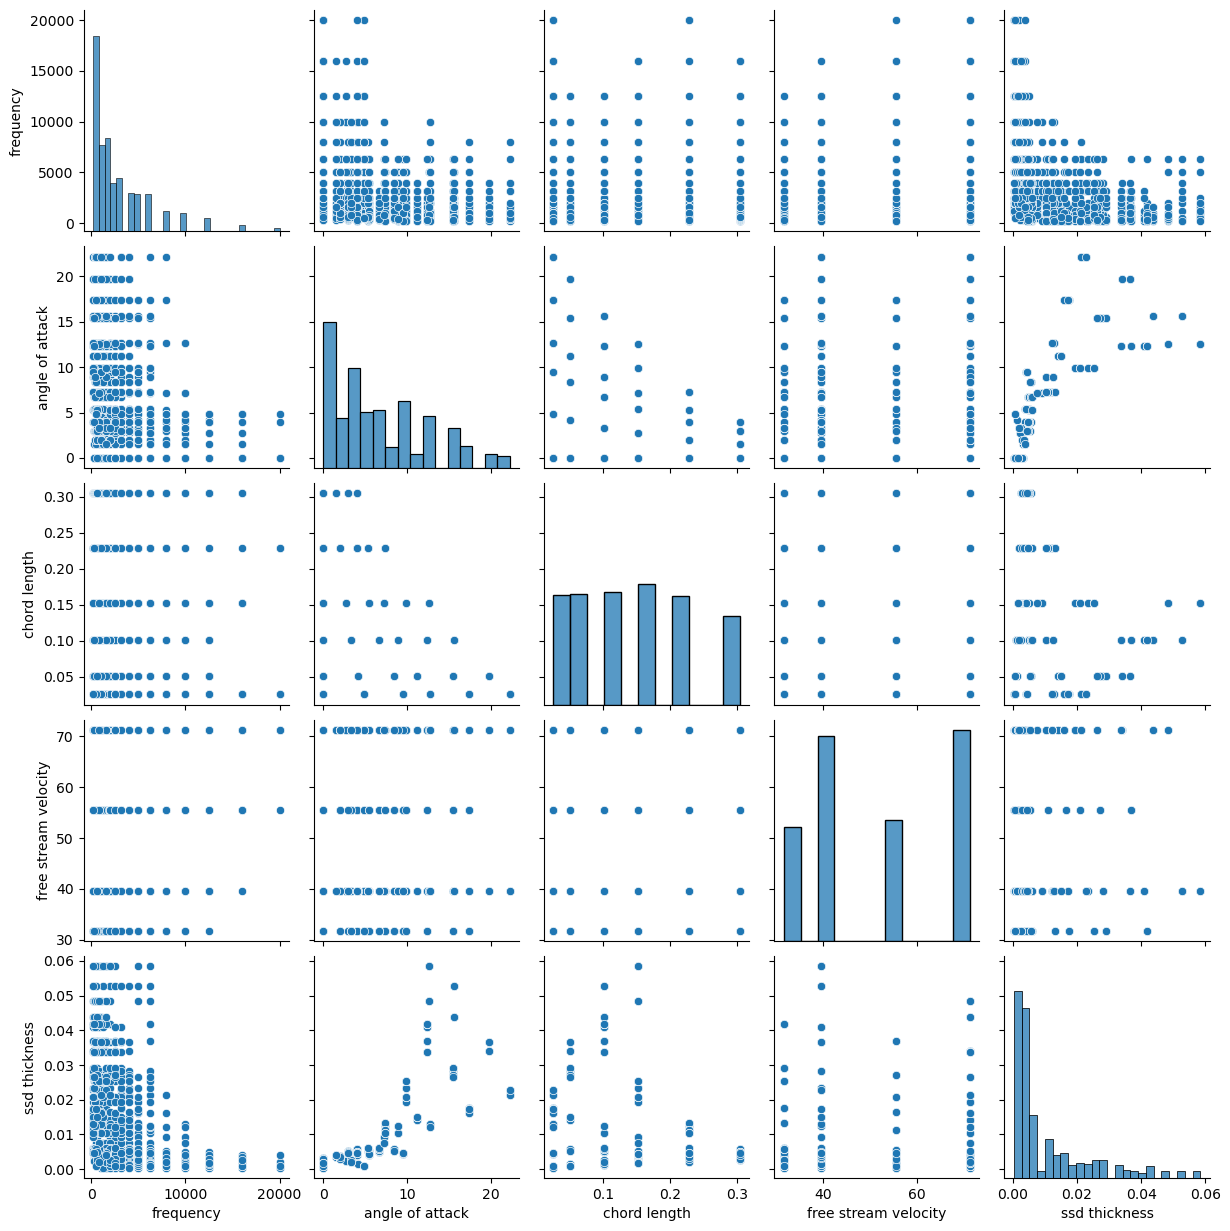

In [9]:
import seaborn as sns
sns.pairplot(X_train)

In [10]:
import matplotlib.pyplot as pyplot
X_train.corr()

,frequency,angle of attack,chord length,free stream velocity,ssd thickness
frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
free stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
ssd thickness,-0.239878,0.762567,-0.220849,-0.000519,1.000000


In [11]:
X_train.describe()

,frequency,angle of attack,chord length,free stream velocity,ssd thickness
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,2940.461768,6.642900,0.138376,51.426415,0.010924
std,3263.876137,5.854266,0.094140,15.608055,0.012976
min,200.000000,0.000000,0.025400,31.700000,0.000401
25%,800.000000,2.000000,0.050800,39.600000,0.002514
50%,1600.000000,5.300000,0.101600,55.500000,0.004957
75%,4000.000000,9.900000,0.228600,71.300000,0.015048
max,20000.000000,22.200000,0.304800,71.300000,0.058411


<Axes: >

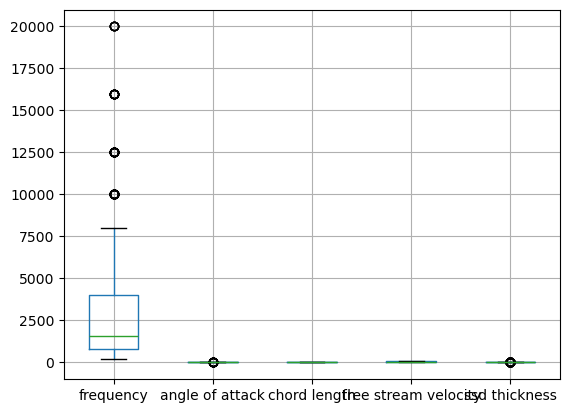

In [12]:
X_train.boxplot()

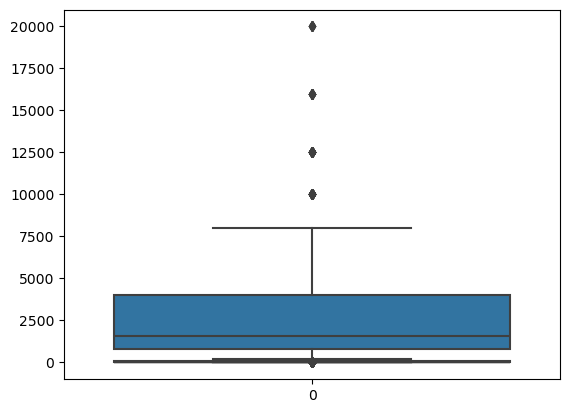

In [13]:
for i in X_train.columns:
    sns.boxplot(X_train[i])

<Axes: >

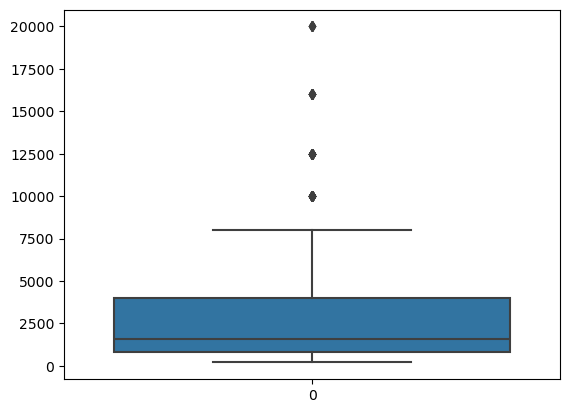

In [14]:
sns.boxplot(X_train['frequency'])

In [15]:
sns.scatterplot(X_train['frequency'],y)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [17]:
y


0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: pressure level, Length: 1503, dtype: float64

In [18]:
y_train

845     130.311
1026    126.944
621     120.228
1371    132.116
195     122.044
         ...   
1130    121.547
1294    131.074
860     133.130
1459    124.717
1126    128.978
Name: pressure level, Length: 1007, dtype: float64

<Axes: >

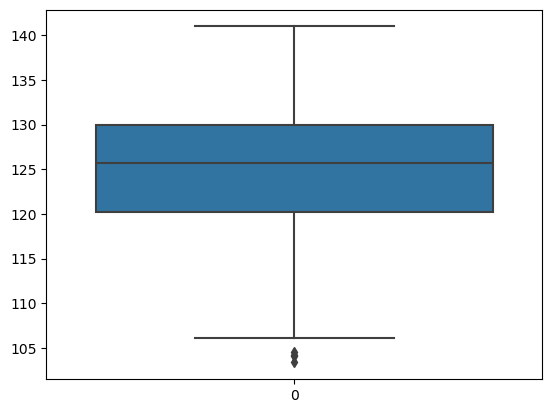

In [19]:
sns.boxplot(df['pressure level'])

In [20]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
import pickle

In [25]:
pickle.dump(regressor, open('model.pkl','wb'))

In [23]:
!pip install flask

In [26]:
pickled_model = pickle.load(open('model.pkl','rb'))
pickled_model.predict(X_test)

array([124.06768512, 119.59316737, 120.29933092, 129.61912851,
       129.81089779, 132.61068301, 122.44438053, 126.7461602 ,
       129.99906397, 125.94601069, 132.50626617, 113.78942913,
       130.10151743, 132.51123677, 123.6412694 , 114.10666435,
       124.31679905, 126.6766228 , 129.24252599, 131.79580713,
       125.77675782, 125.02970619, 116.44955941, 129.88018679,
       124.2232864 , 124.67967727, 131.60657138, 124.57186337,
       115.76458243, 123.39652912, 125.13674229, 123.92018299,
       125.4841971 , 118.61796101, 121.70395495, 130.95730463,
       131.39243856, 128.29169206, 121.31077749, 117.99901537,
       126.41139865, 128.86175217, 126.44075781, 123.46463781,
       123.08590861, 130.13707376, 125.11244177, 120.01115538,
       123.19344296, 132.81698484, 128.72414835, 117.7903339 ,
       123.4283675 , 122.57110308, 126.71758509, 120.44811529,
       123.29741941, 128.68403927, 124.25898336, 123.22309466,
       125.44226349, 131.08621938, 126.73671008, 131.37